In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [2]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target
x = cancer_data.data
x = preprocessing.scale(x)

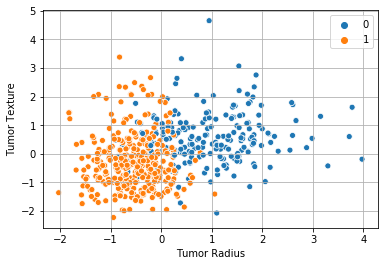

In [3]:
sns.scatterplot(x[:,0],x[:,1],hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [4]:
alpha = np.arange(1e-15,1,0.005)
val_scores = np.zeros((len(alpha),1))
for i in range(len(alpha)):
    model = linear_model.SGDClassifier(loss="hinge",penalty="l2", alpha=alpha[i])
    score = ms.cross_val_score(model, x, y, cv=5)
    val_scores[i] = score.mean()

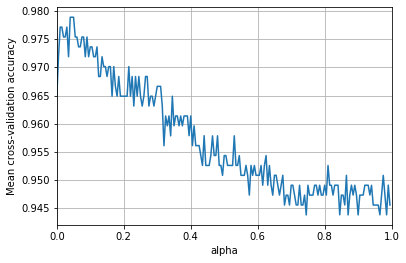

In [5]:
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)
plt.show()

alpha star=  0.040000000000001


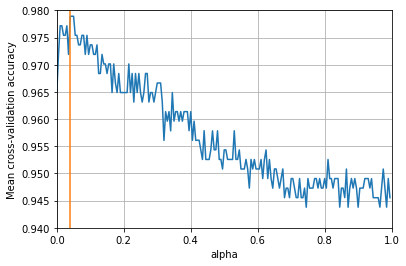

In [6]:
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha star= ',alpha_star)
plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1))
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)
plt.show()

In [7]:
model_star = linear_model.SGDClassifier(loss="hinge",penalty="l2", alpha=alpha_star)
model_trained = model_star.fit(x,y)
print('Trainder accuracy= ',model_trained.score(x,y))

Trainder accuracy=  0.9806678383128296


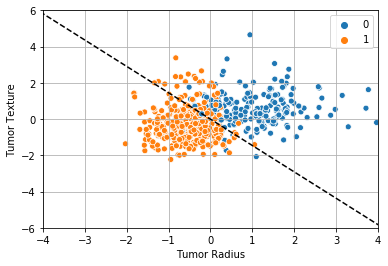

In [8]:
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope * x1
sns.scatterplot(x[:,0],x[:,1],hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()